In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import utils1
import utils2
import utils3

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\deepp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\deepp\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\deepp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\deepp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
df = pd.read_csv("preprocessed_0f_turkey.csv", low_memory=False)

In [3]:
df['processed_text'] = df['processed_text'].astype(str)

In [4]:
df.head()

,text,date,processed_text
0,Hey Turkish users are getting a rate limit ...,2023-02-06 13:04:30+00:00,hey turkish users are getting rate limit excee...
1,May Allah have mercy on all those who passed a...,2023-02-06 13:04:30+00:00,may allah have mercy on all those who passed a...
2,We Stand with Turkey,2023-02-06 13:04:31+00:00,we stand with turkey
3,🔔 ( M3.9 occurred 21 km E of ( 37 min ago (lo...,2023-02-06 13:04:33+00:00,occurred km of min ago local time smile more ...
4,🚨 Former Newcastle United star Christian Atsu ...,2023-02-06 13:04:33+00:00,former newcastle united star christian atsu i...


In [5]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
df.isna().sum()

text              0
date              0
processed_text    0
dtype: int64

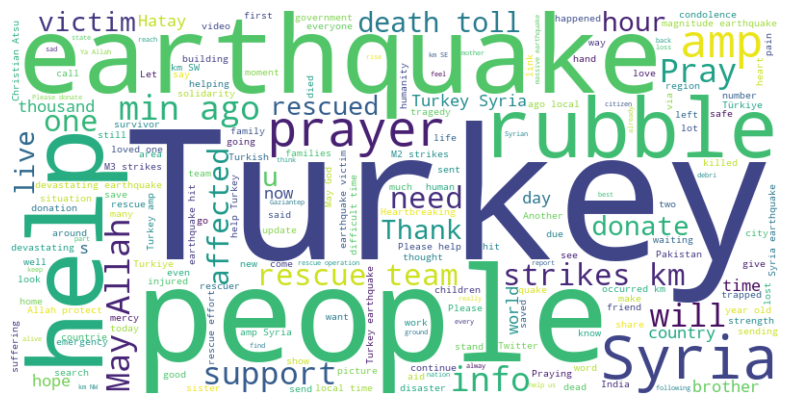

In [7]:
all_text = ' '.join(df['text'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [8]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from termcolor import colored
import gensim
import nltk
nltk.download('averaged_perceptron_tagger')

pd.options.mode.chained_assignment = None

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\deepp\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [9]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [11]:
from tqdm import tqdm

In [12]:
def process_text(text):
    tokens = nltk.pos_tag(word_tokenize(text))
    tokens = [lemmatizer.lemmatize(w[0], utils2.pos_tag_convert(w[1])) for w in tokens if w[0].lower() not in stop_words]
    
    return tokens

# def process_random_message(df):
#     df['tokens'] = df['processed_text'].apply(process_text)
#     return df
def process_random_message(df):
    tqdm.pandas()  # Use tqdm with pandas

    # Apply process_text function to each entry in the processed_text column
    df['tokens'] = df['processed_text'].progress_apply(process_text)
    return df


df = process_random_message(df)
df

100%|███████████████████████████████████████████████████████████████████████████| 36777/36777 [01:30<00:00, 408.07it/s]


,text,date,processed_text,tokens
0,Hey Turkish users are getting a rate limit ...,2023-02-06 13:04:30+00:00,hey turkish users are getting rate limit excee...,"[hey, turkish, user, get, rate, limit, exceed,..."
1,May Allah have mercy on all those who passed a...,2023-02-06 13:04:30+00:00,may allah have mercy on all those who passed a...,"[may, allah, mercy, pass, away, make, easy, af..."
2,We Stand with Turkey,2023-02-06 13:04:31+00:00,we stand with turkey,"[stand, turkey]"
3,🔔 ( M3.9 occurred 21 km E of ( 37 min ago (lo...,2023-02-06 13:04:33+00:00,occurred km of min ago local time smile more ...,"[occur, km, min, ago, local, time, smile, info]"
4,🚨 Former Newcastle United star Christian Atsu ...,2023-02-06 13:04:33+00:00,former newcastle united star christian atsu i...,"[former, newcastle, united, star, christian, a..."
...,...,...,...,...
36772,Massive thanks to you and the entire team fo...,2023-02-10 23:57:03+00:00,massive thanks to you and the entire team for...,"[massive, thanks, entire, team, continued, ama..."
36773,"PLEASE donate to AHBAP charity, the only chari...",2023-02-10 23:58:12+00:00,please donate to ahbap charity the only charit...,"[please, donate, ahbap, charity, charity, help..."
36774,"🙏😭😭😭I thought my heart would burst from grief,...",2023-02-10 23:58:20+00:00,thought my heart would burst from grief tears...,"[think, heart, would, burst, grief, tear, run,..."
36775,Alhamdulilllah they are safe and sound ❤️ ...,2023-02-10 23:58:21+00:00,alhamdulillah they are safe and sound,"[alhamdulillah, safe, sound]"


In [13]:
# Define a function to count number of words
def count_words(text):
    return len(text.split(" "))

# Define a function to count number of tokens
def count_tokens(tokens):
    return len(tokens)

def process_random_message(df):
    tqdm.pandas()  # Use tqdm with pandas

    # Apply process_text function to each entry in the processed_text column
    df['tokens'] = df['processed_text'].progress_apply(process_text)

    # Count number of words and save as a column
    df["num_words"] = df.processed_text.progress_apply(count_words)

    # Count number of tokens and save as a column
    df["num_tokens"] = df.tokens.progress_apply(count_tokens)
    
    return df

df = process_random_message(df)
df

100%|████████████████████████████████████████████████████████████████████████| 36777/36777 [00:00<00:00, 610686.52it/s]


,text,date,processed_text,tokens,num_words,num_tokens
0,Hey Turkish users are getting a rate limit ...,2023-02-06 13:04:30+00:00,hey turkish users are getting rate limit excee...,"[hey, turkish, user, get, rate, limit, exceed,...",26,18
1,May Allah have mercy on all those who passed a...,2023-02-06 13:04:30+00:00,may allah have mercy on all those who passed a...,"[may, allah, mercy, pass, away, make, easy, af...",27,13
2,We Stand with Turkey,2023-02-06 13:04:31+00:00,we stand with turkey,"[stand, turkey]",5,2
3,🔔 ( M3.9 occurred 21 km E of ( 37 min ago (lo...,2023-02-06 13:04:33+00:00,occurred km of min ago local time smile more ...,"[occur, km, min, ago, local, time, smile, info]",13,8
4,🚨 Former Newcastle United star Christian Atsu ...,2023-02-06 13:04:33+00:00,former newcastle united star christian atsu i...,"[former, newcastle, united, star, christian, a...",36,24
...,...,...,...,...,...,...
36772,Massive thanks to you and the entire team fo...,2023-02-10 23:57:03+00:00,massive thanks to you and the entire team for...,"[massive, thanks, entire, team, continued, ama...",31,18
36773,"PLEASE donate to AHBAP charity, the only chari...",2023-02-10 23:58:12+00:00,please donate to ahbap charity the only charit...,"[please, donate, ahbap, charity, charity, help...",34,19
36774,"🙏😭😭😭I thought my heart would burst from grief,...",2023-02-10 23:58:20+00:00,thought my heart would burst from grief tears...,"[think, heart, would, burst, grief, tear, run,...",21,11
36775,Alhamdulilllah they are safe and sound ❤️ ...,2023-02-10 23:58:21+00:00,alhamdulillah they are safe and sound,"[alhamdulillah, safe, sound]",7,3


In [53]:
# # Count number of words and save as a column
# df["num_words"] = df.processed_text.apply(lambda x: len(x.split(" ")))

# # Count number of tokens and save as a column
# df["num_tokens"] = df.tokens.apply(lambda x: len(x))

In [14]:
df.head()

,text,date,processed_text,tokens,num_words,num_tokens
0,Hey Turkish users are getting a rate limit ...,2023-02-06 13:04:30+00:00,hey turkish users are getting rate limit excee...,"[hey, turkish, user, get, rate, limit, exceed,...",26,18
1,May Allah have mercy on all those who passed a...,2023-02-06 13:04:30+00:00,may allah have mercy on all those who passed a...,"[may, allah, mercy, pass, away, make, easy, af...",27,13
2,We Stand with Turkey,2023-02-06 13:04:31+00:00,we stand with turkey,"[stand, turkey]",5,2
3,🔔 ( M3.9 occurred 21 km E of ( 37 min ago (lo...,2023-02-06 13:04:33+00:00,occurred km of min ago local time smile more ...,"[occur, km, min, ago, local, time, smile, info]",13,8
4,🚨 Former Newcastle United star Christian Atsu ...,2023-02-06 13:04:33+00:00,former newcastle united star christian atsu i...,"[former, newcastle, united, star, christian, a...",36,24


In [15]:
# All of the messages in the dataset
corpus = df.tokens

# Create the Dictionary
corpus_dictionary = gensim.corpora.Dictionary(corpus)

print(colored("Before filter: ", "blue"), f"Dictionary contains a total of {len(corpus_dictionary)} unique words")

# Filter for words that occur more than 5 times overall
corpus_dictionary.filter_extremes(no_below=5)

# Create bag of words out of the full corpus
corpus_bow = [corpus_dictionary.doc2bow(doc) for doc in corpus]

print(colored("After filter: ", "blue"), f"Dictionary contains a total of {len(corpus_dictionary)} unique words")

Before filter:  Dictionary contains a total of 19263 unique words
After filter:  Dictionary contains a total of 4605 unique words


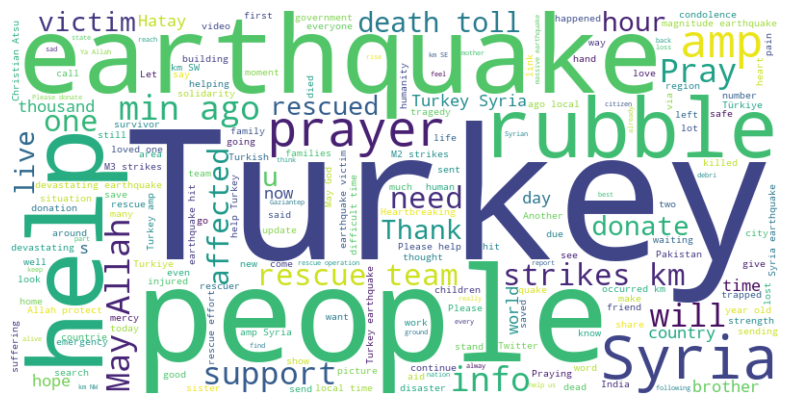

In [16]:
# Convert bag of words back to text format
corpus_text = [[corpus_dictionary[word_id] for word_id, freq in doc] for doc in corpus_bow]

# Flatten the list of lists
corpus_text_flat = [word for sublist in corpus_text for word in sublist]

# Join the words into a single string
corpus_text_combined = ' '.join(corpus_text_flat)

# Generate word cloud
wordcloud1 = WordCloud(width=800, height=400, background_color='white').generate(corpus_text_combined)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [17]:
import warnings
warnings.filterwarnings('ignore')
import nltk
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from termcolor import colored
import random
import gensim

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\deepp\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [18]:
corpus

0        [hey, turkish, user, get, rate, limit, exceed,...
1        [may, allah, mercy, pass, away, make, easy, af...
2                                          [stand, turkey]
3          [occur, km, min, ago, local, time, smile, info]
4        [former, newcastle, united, star, christian, a...
                               ...                        
36772    [massive, thanks, entire, team, continued, ama...
36773    [please, donate, ahbap, charity, charity, help...
36774    [think, heart, would, burst, grief, tear, run,...
36775                         [alhamdulillah, safe, sound]
36776    [please, donate, like, share, raise, awareness...
Name: tokens, Length: 36777, dtype: object

In [19]:
all_words = list(corpus_dictionary.values())

print(f"Dictionary contains a total of {len(all_words)} unique words")

Dictionary contains a total of 4605 unique words


In [20]:
all_words

['consecutive',
 'every',
 'exceed',
 'get',
 'hey',
 'limit',
 'look',
 'may',
 'rate',
 'send',
 'think',
 'time',
 'try',
 'turkish',
 'tweet',
 'user',
 'want',
 'warn',
 'affect',
 'allah',
 'amp',
 'away',
 'devastate',
 'earthquake',
 'easy',
 'make',
 'mercy',
 'pass',
 'syria',
 'turkey',
 'stand',
 'ago',
 'info',
 'km',
 'local',
 'min',
 'occur',
 'smile',
 'among',
 'atsu',
 'christian',
 'effort',
 'everyone',
 'former',
 'injure',
 'massive',
 'newcastle',
 'prompt',
 'recovery',
 'reportedly',
 'rescue',
 'rubble',
 'search',
 'speedy',
 'star',
 'strike',
 'trap',
 'united',
 'victim',
 'wish',
 'amen',
 'heart',
 'heavy',
 'people',
 'alarm',
 'alert',
 'around',
 'call',
 'condition',
 'country',
 'declare',
 'fourth',
 'help',
 'include',
 'international',
 'level',
 'message',
 'need',
 'pf',
 'reading',
 'save',
 'state',
 'world',
 'scary',
 'scene',
 'break',
 'brother',
 'dead',
 'go',
 'least',
 'morning',
 'prayer',
 'region',
 'sister',
 'family',
 'friend',

In [22]:
# Set the number of topics
max_number_of_topics = 10
n_topics_range = range(2, max_number_of_topics + 1)

# Dictionary to save trained models
LDA_models = {}
print(f"Training LDA models from 2 to {max_number_of_topics} topics")

# For number of topics ranging from 2 to max_number_of_topics
for i in n_topics_range:
    # Save model
    LDA_models[i] = utils3.train_lda_model(num_topics=i, corpus_bow=corpus_bow, corpus=corpus, corpus_dictionary=corpus_dictionary) # Training all models takes around 2 mins
    print(f"Successfully trained LDA model on {i} topics")

Training LDA models from 2 to 10 topics
Successfully trained LDA model on 2 topics
Successfully trained LDA model on 3 topics
Successfully trained LDA model on 4 topics
Successfully trained LDA model on 5 topics
Successfully trained LDA model on 6 topics
Successfully trained LDA model on 7 topics
Successfully trained LDA model on 8 topics
Successfully trained LDA model on 9 topics
Successfully trained LDA model on 10 topics


In [23]:
utils3.top_words_plot(LDA_models, max_number_of_topics)

interactive(children=(Dropdown(description='# of topics', options=(2, 3, 4, 5, 6, 7, 8, 9, 10), value=2), Outp…

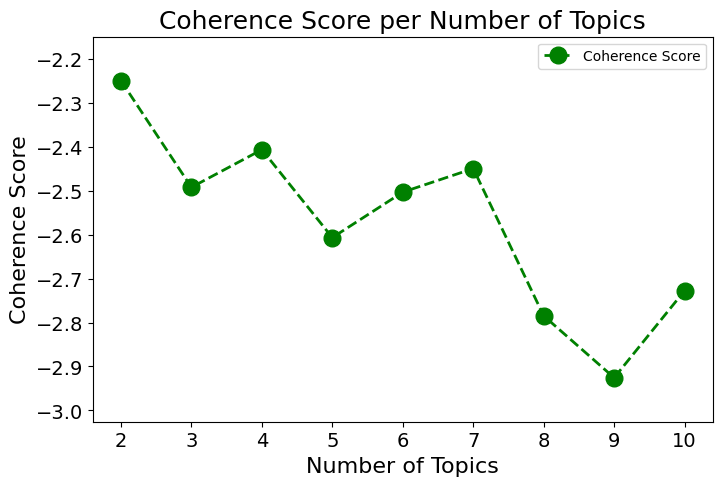

In [67]:
# save coherence scores in a list
coherence_scores_lda = [LDA_models[i].coherence_score for i in n_topics_range]

# plot coherence score as a function of number of topics
utils3.plot_coherences_lda(n_topics_range, coherence_scores_lda)

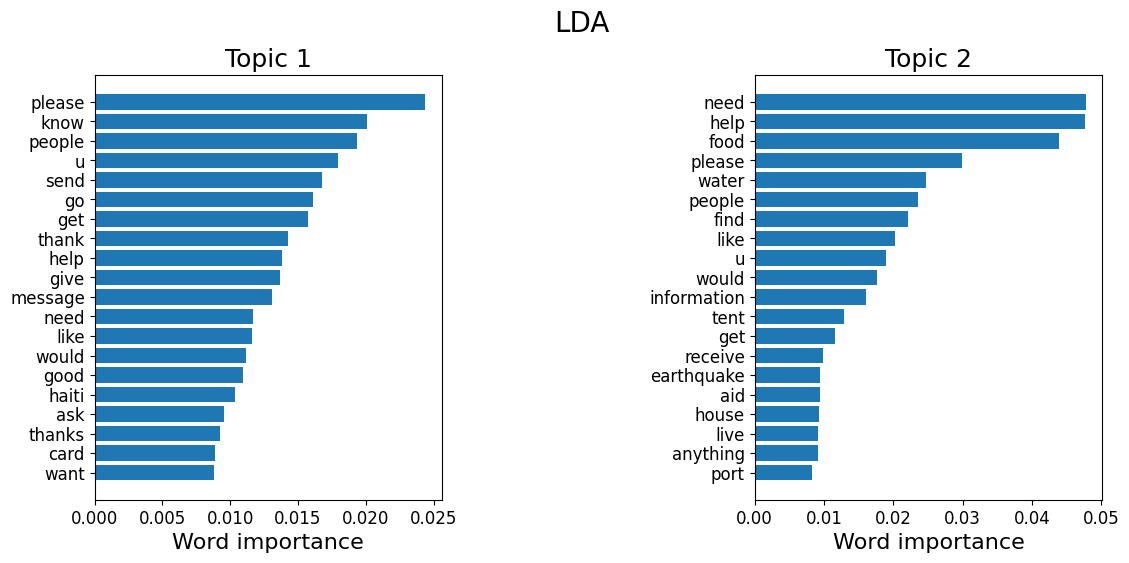

In [68]:
num_topics = 2

# Select the model from the trained models
lda_model_final = LDA_models[num_topics]

# Plot the top ten words for the selected model again
utils3.plot_top_words_lda(num_topics, lda_model_final.model, num_words=20)

In [69]:
import seaborn as sns
# import termcolor 

In [72]:
def plot_topic_importance(corpus_bow, data, lda_2_topics, num_topics):
    topics_on_messages = lda_3_topics.model.get_document_topics(corpus_bow, minimum_probability=0.0)

    result = []
    start_date = data['date'].min()  # Minimum date from the DataFrame
    end_date = data['date'].max()  # Maximum date from the DataFrame
    n_days = (end_date - start_date).days
    for delta in range(n_days):
        sum_by_topic = [0] * num_topics
        today = start_date + pd.Timedelta(days=delta)
        tomorrow = start_date + pd.Timedelta(days=delta+1)
        index_range = data.loc[(data['date'] >= today) & (data['date'] < tomorrow)].index
        for k in index_range:
            for i in range(num_topics):
                sum_by_topic[i] += topics_on_messages[k][i][1]
        sum_by_topic = np.array(sum_by_topic)
        sum_by_topic = sum_by_topic / np.sum(sum_by_topic)

        result.append(sum_by_topic)
    result = np.array(result)

    result3 = []
    days_per_tick = 4

    for i in range(n_days):
        for topic in range(num_topics):
            rows = result[i, topic]
            result3.append([int(i / days_per_tick), np.sum(rows), topic])

    result3 = np.array(result3)

    plt.figure(figsize=(15, 5))

    style = [f"Topic {int(x) + 1}" for x in result3[:,2]]
    ax = sns.lineplot(x=result3[:,0]*days_per_tick, y=result3[:,1], hue=style, style=style)
    ax.set(xlabel='Days', ylabel='Topic importance')
    ax.tick_params(labelsize=14)
    ax.set_title(f"Topic importance over time", fontsize=22)
    ax.set_xlabel("Days", fontsize=18)
    ax.set_ylabel("Topic importance", fontsize=18)
    ax.legend(fontsize=14)

    plt.show()


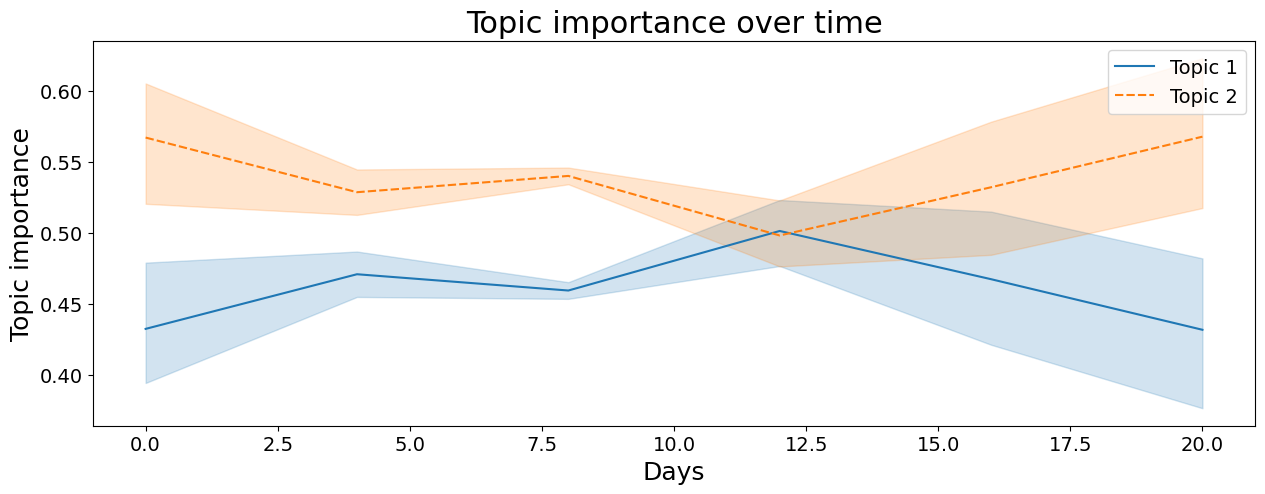

In [73]:
plot_topic_importance(corpus_bow, df, lda_model_final, num_topics)